In [16]:
!wget https://www.dropbox.com/s/hm8o3b4n6v2x6rh/QueryResults.csv?dl=0
!wget https://www.dropbox.com/s/6wdv4wff68kqg4r/QueryResults%281%29.csv?dl=0
!wget https://www.dropbox.com/s/o178o5948veihdy/QueryResults%283%29.csv?dl=0
!wget https://www.dropbox.com/s/tmsqzix4t43b8xt/QueryResults%284%29.csv?dl=0
!wget https://www.dropbox.com/s/3g2p6ayrznm62vi/QueryResults%285%29.csv?dl=0
!wget https://www.dropbox.com/s/zwqnns5b8ofbwwy/QueryResults%286%29.csv?dl=0
!wget https://www.dropbox.com/s/ksd77vmnaswip9y/lemmatized_v1.csv?dl=0
!wget https://www.dropbox.com/s/hkju4w3xleucft1/lemmatized__v2.csv?dl=0

--2019-05-26 10:07:36--  https://www.dropbox.com/s/hm8o3b4n6v2x6rh/QueryResults.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hm8o3b4n6v2x6rh/QueryResults.csv [following]
--2019-05-26 10:07:36--  https://www.dropbox.com/s/raw/hm8o3b4n6v2x6rh/QueryResults.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab102ebdc37f39afee26f01386.dl.dropboxusercontent.com/cd/0/inline/AhnyzqYZzMrxZbV4O7mRCXGLkQK7jnhSjYzXahmJMBTo1vX8vIfBOA4dhfp9J5MVgQ_UCo6kKQDF9osfJr5-I0qoY2qvy1F3x3m3QPsMQf1jFA/file# [following]
--2019-05-26 10:07:36--  https://ucab102ebdc37f39afee26f01386.dl.dropboxusercontent.com/cd/0/inline/AhnyzqYZzMrxZbV4O7mRCXGLkQK7jnhSjYzXahmJMBTo1vX8vIfBOA4dhfp9J5MVgQ_UCo6kKQDF9osfJr5-I0qoY2qvy1F3x3m3QPsMQf1jFA/file
Re

In [0]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib.collections import LineCollection

# We load our data and visualize the first 50 lines.

nltk.download("stopwords")
sns.set()

df_1 = pd.read_csv('QueryResults.csv?dl=0')
df_2 = pd.read_csv('QueryResults(1).csv?dl=0')
df_3 = pd.read_csv('QueryResults(3).csv?dl=0')
df_4 = pd.read_csv('QueryResults(4).csv?dl=0')
df_5 = pd.read_csv('QueryResults(5).csv?dl=0')
df_6 = pd.read_csv('QueryResults(6).csv?dl=0')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
df.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,2,46.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,420,NaN,<p>An explicit cast to double like this isn't ...,9.0,NaN,4020527.0,NaN,2017-12-16 05:06:57,2017-12-16 05:06:57,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,422.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36.0,3,536.0,NaN,2009-09-04 13:15:59
5,12,2,NaN,11.0,2008-07-31 23:56:41,NaN,324,NaN,"<p>Here's how I do it</p>\n\n<pre class=""lang-...",1.0,NaN,1271898.0,GateKiller,2018-01-12 16:10:22,2018-01-12 16:10:22,NaN,NaN,NaN,11,NaN,NaN,2009-09-04 13:15:59
6,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,144.0,NaN,NaN
7,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,389,117797.0,"<p>What is the difference between <a href=""htt...",11.0,Anonymous User,6495084.0,Rich B,2017-02-25 17:42:17,2018-09-19 03:49:19,Difference between Math.Floor() and Math.Trunc...,<.net><math>,10.0,4,55.0,NaN,NaN
8,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,121,80977.0,<p>How do you expose a LINQ query as an ASMX w...,2.0,NaN,567854.0,Chris Fournier,2019-01-20 13:50:51,2019-01-20 13:50:51,Filling a DataSet or DataTable from a LINQ que...,<c#><linq><web-services><.net-3.5>,6.0,0,14.0,NaN,NaN
9,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,171,70175.0,"<p>How do I store binary data in <a href=""http...",2.0,NaN,546051.0,NaN,2011-10-21 21:29:17,2018-01-20 09:06:34,Binary Data in MySQL,<mysql><database><binary-data><data-storage>,9.0,3,19.0,2018-11-29 15:36:04,NaN


(284147, 22)
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object')


Text(0.5, 1.0, 'Proportion of Nans in each column')

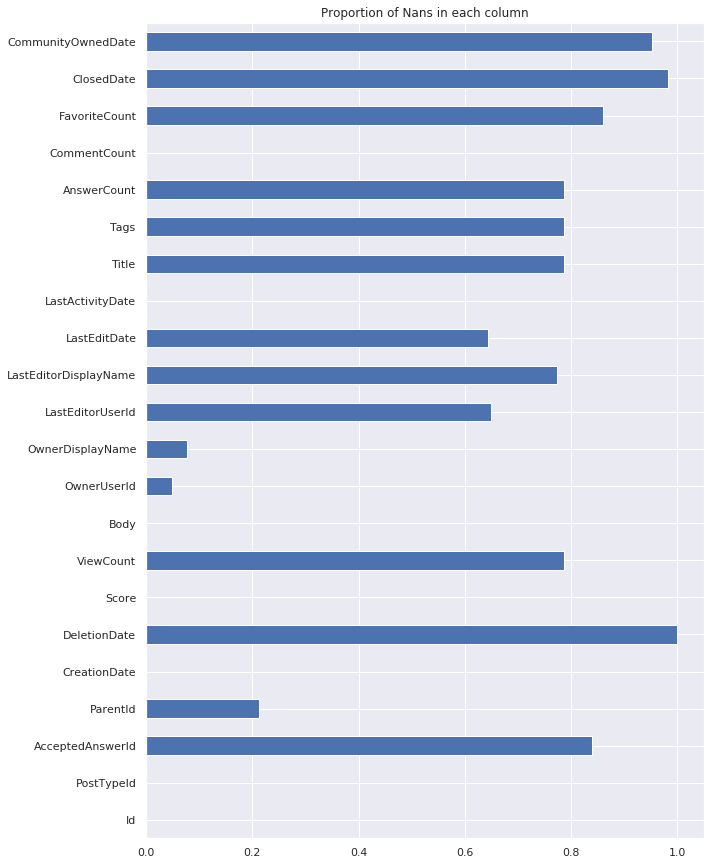

In [0]:
# We visualize, using a barplot, Nans proportion in each column of our dataset

print(df.shape)
print(df.columns)
plt.figure(figsize=(10, 15))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of Nans in each column")

In [0]:
# Making a list of the different tags 

set_tags = set()
scoring = list()

for list_keywords, score in zip(df['Tags'].str.split('>').values, df['Score']):
    
    if isinstance(list_keywords, float): 
        continue 
    
    scoring.append(score)
    set_tags = set_tags.union(list_keywords)
    
    

def count_tag(data, ref_col, list_words, list_scores): 
    ''' Count the number of occurrences and the average score for each tag
    
    Parameters:
    
        data (dataframe): dataframe to use 
        ref_col (serie): column of dataframe containing tags
        list_words (list): list of different tags
        list_scores (list) : list of the different scores of the posts
    '''
    
    keyword_count = dict()
    index = -1
    
    for s in list_words: 
        keyword_count[s] = []
        keyword_count[s].append(0)
        keyword_count[s].append(0)
        
    for list_keywords in data[ref_col].str.split('>'): 
        
        if type(list_keywords) == float and pd.isnull(list_keywords): 
            continue
        
        index += 1
            
        for s in [s for s in list_keywords if s in list_words]: 
            if pd.notnull(s):
                keyword_count[s][0] += 1
                score = list_scores[index]
                keyword_count[s][1] += score
                    
    # conversion of our dictionary into a list
    keyword_occurences = []
    keyword_scores = []
    
    for tag, item in keyword_count.items():
        keyword_occurences.append([tag[1:], item[0], item[1]/item[0]])
        keyword_scores.append([tag[1:], item[1]/item[0]])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    keyword_scores.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_scores

keyword_occurences, keyword_scores = count_tag(df, 'Tags', set_tags, scoring)
keyword_occurences[1:5]

[['c#', 7836, 31.025012761613066],
 ['.net', 6108, 25.699574328749183],
 ['java', 4461, 41.05783456624075],
 ['asp.net', 3930, 10.129007633587786]]

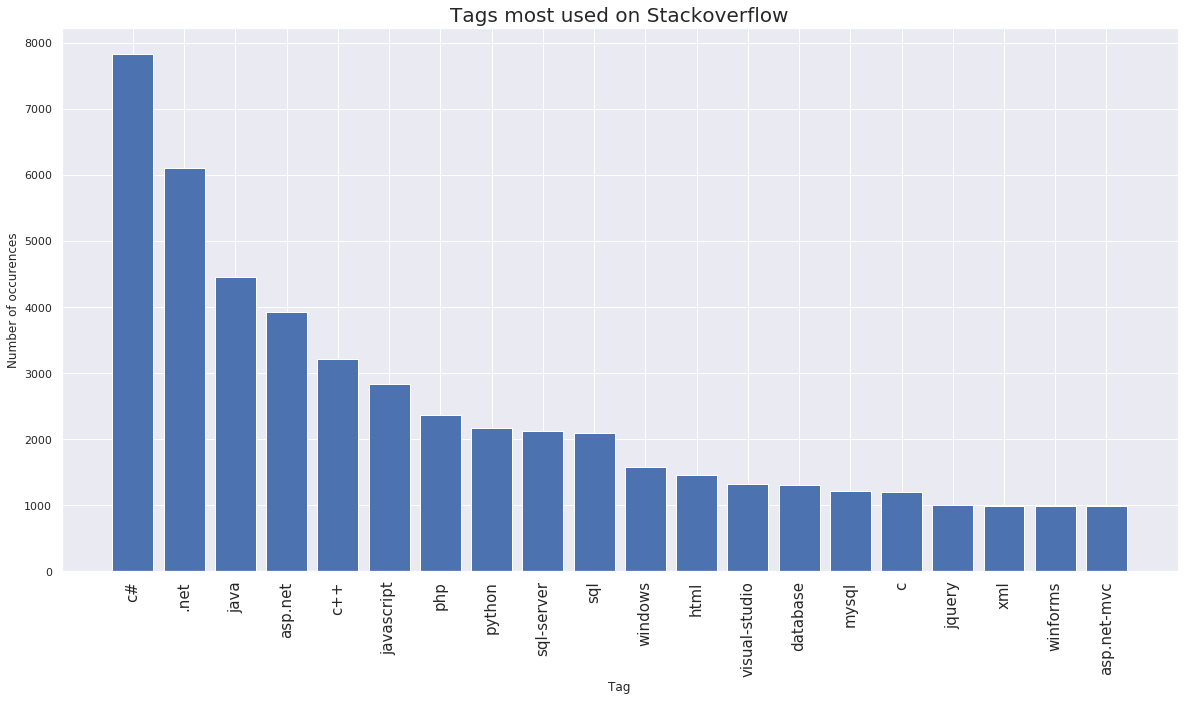

In [0]:
trunc_occurences = keyword_occurences[1:21]

# Graph showing the 20 tags most used on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Tag", ylabel="Number of occurences")

plt.bar(label_x, y_axis)
plt.title("Tags most used on Stackoverflow",fontsize=20)
plt.show()

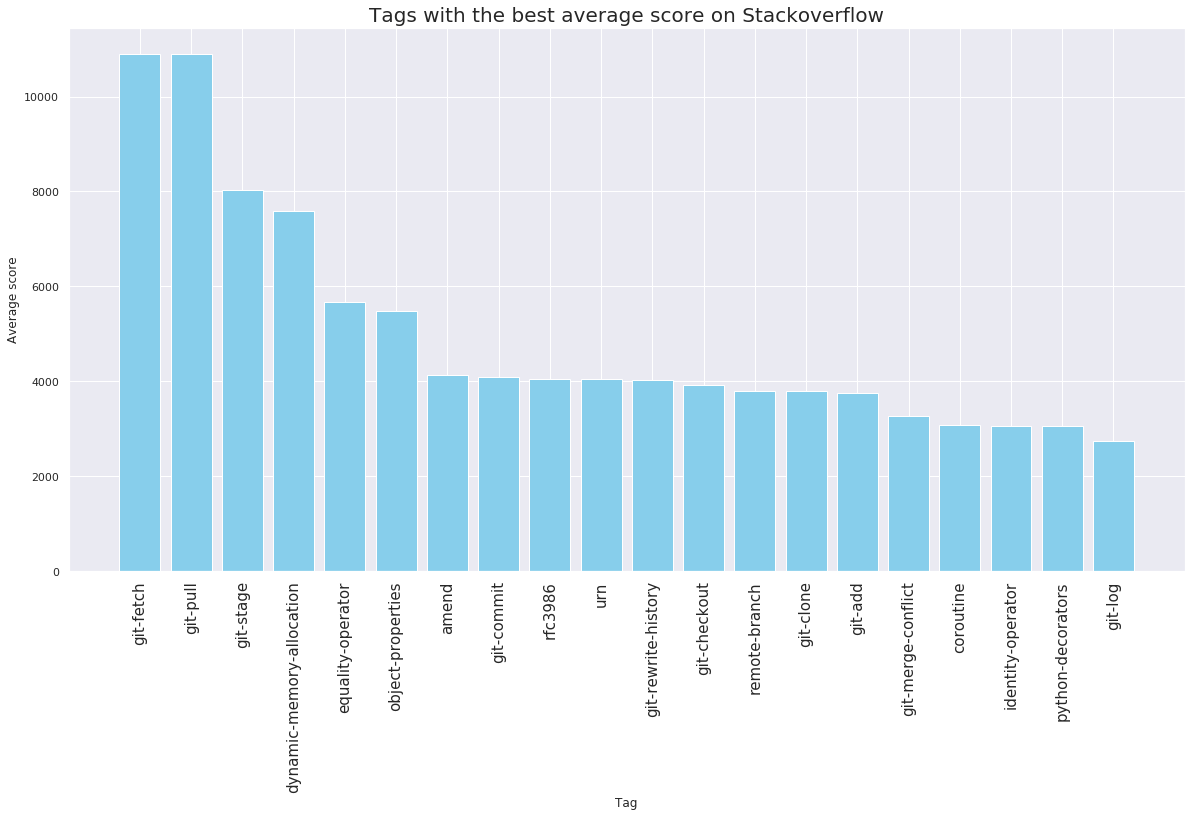

In [0]:
trunc_scores = keyword_scores[:20]

# Graph showing the tags most used on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in trunc_scores]
x_axis = [k for k,i in enumerate(trunc_scores)]
label_x = [i[0] for i in trunc_scores]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Tag", ylabel="Average score")

plt.bar(label_x, y_axis, color='skyblue')
plt.title("Tags with the best average score on Stackoverflow",fontsize=20)
plt.show()

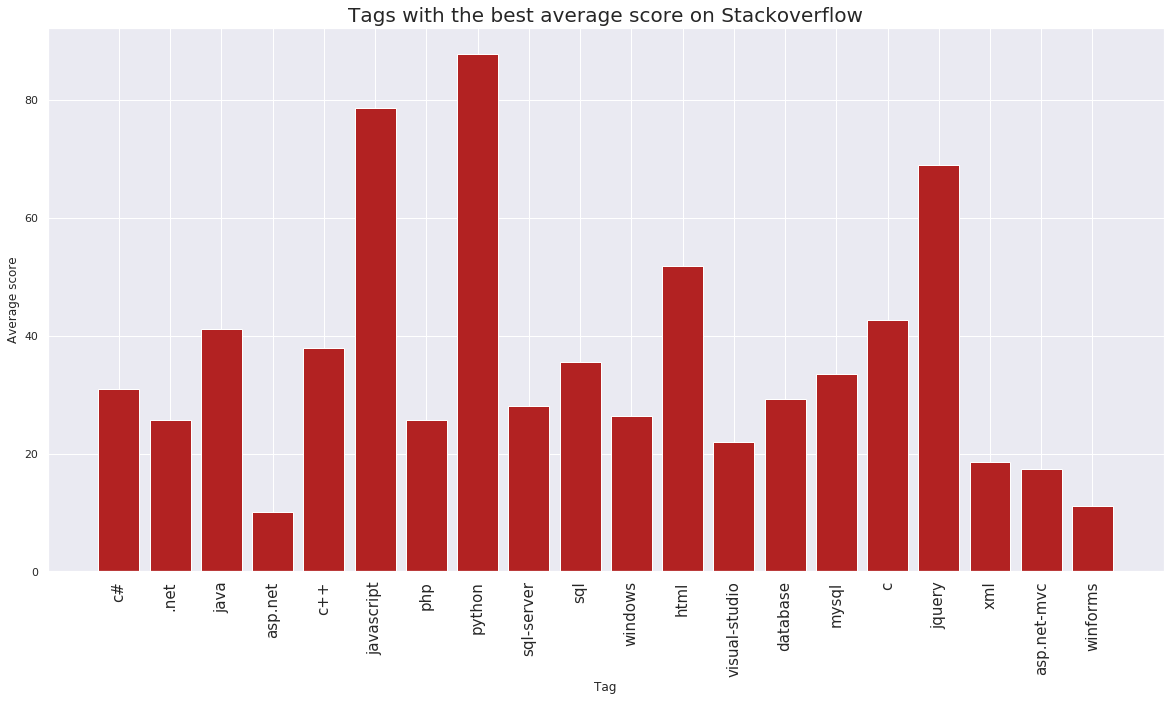

In [0]:
trunc_occurences = keyword_occurences[1:21]

# Graph showing the tags with the best average score on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[2]  for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Tag", ylabel="Average score")

plt.bar(label_x, y_axis, color='firebrick')
plt.title("Tags with the best average score on Stackoverflow",fontsize=20)
plt.show()

In [0]:
# the text of the post, without tags or markup

df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [0]:
df['Body'][0]

0    I want to use a track-bar to change a form's o...
0    With an inner select:\nselect \n  registration...
0    It can be useful.  The users may have deleted ...
0    Because the compiler is packing your bitfield ...
0    If you wind up hand-rolling a solution due lac...
0    If you have a clustered index that is not on a...
Name: Body, dtype: object

In [0]:
def sent_to_words(sentences):
    ''' Convert a document into a list of lowercase tokens, ignoring tokens that
        are too short or too long 
    
    Parameter:
    
        sentences (serie): a serie in which tou have your corpus'''
    
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [0]:
data_words = list(sent_to_words(df["Body"]))
print(data_words[:5])

[['want', 'to', 'use', 'track', 'bar', 'to', 'change', 'form', 'opacity', 'this', 'is', 'my', 'code', 'decimal', 'trans', 'trackbar', 'value', 'this', 'opacity', 'trans', 'when', 'build', 'the', 'application', 'it', 'gives', 'the', 'following', 'error', 'cannot', 'implicitly', 'convert', 'type', 'decimal', 'to', 'double', 'tried', 'using', 'trans', 'and', 'double', 'but', 'then', 'the', 'control', 'doesn', 'work', 'this', 'code', 'worked', 'fine', 'in', 'past', 'vb', 'net', 'project'], ['have', 'an', 'absolutely', 'positioned', 'div', 'containing', 'several', 'children', 'one', 'of', 'which', 'is', 'relatively', 'positioned', 'div', 'when', 'use', 'percentage', 'based', 'width', 'on', 'the', 'child', 'div', 'it', 'collapses', 'to', 'width', 'on', 'internet', 'explorer', 'but', 'not', 'on', 'firefox', 'or', 'safari', 'if', 'use', 'pixel', 'width', 'it', 'works', 'if', 'the', 'parent', 'is', 'relatively', 'positioned', 'the', 'percentage', 'width', 'on', 'the', 'child', 'works', 'is', 't

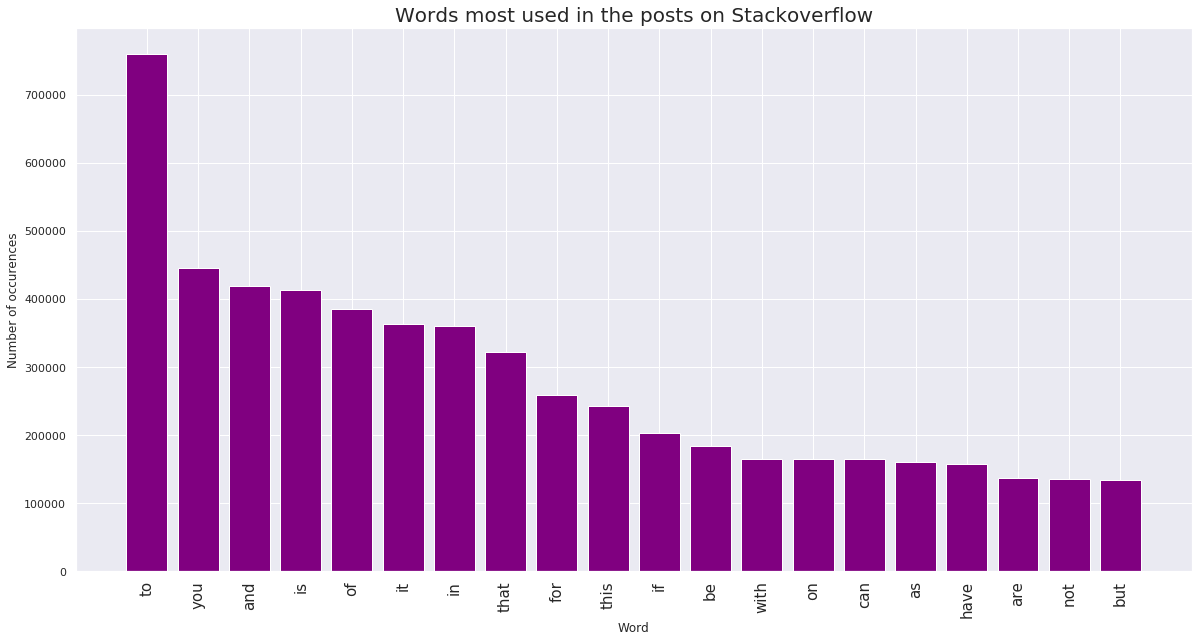

In [0]:
words = dict()

for sentence in data_words:
    
    for word in sentence:
        
        if word not in words.keys():
            words[word] = 1
           
        elif word in words.keys():
            words[word] += 1
            
occurences = []
    
for word, occurence in words.items():
    occurences.append([word, occurence])
            
occurences.sort(key = lambda x:x[1], reverse = True)
words_occurences = occurences[1:21]

# Graph showing the words most used in the post on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_occurences]
x_axis = [k for k,i in enumerate(words_occurences)]
label_x = [i[0] for i in words_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='purple')
plt.title("Words most used in the posts on Stackoverflow",fontsize=20)
plt.show()

In [0]:
stop_words = nltk.corpus.stopwords.words('english')

def lemmatization(texts, allowed_postags, stop_words=stop_words):
    '''It keeps the lemma of the words (lemma is the uninflected form of a word)
    end remove stop words.
    
    Parameters:
    
    texts (list): list of words
    allowed_postags (list): list of allowed postags, like NOUN, ADL, VERB, ADV'''
    
    texts = [[word for word in doc if word not in stop_words]
             for doc in texts]
    texts_out = []
    
    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    nlp = spacy.load('en', disable=['parser', 'ner'])
             
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' 
                                   for token in doc if token.pos_ in allowed_postags]))

    return texts_out

In [0]:
# Lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, ['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['want use track bar change form opacity code decimal tran trackbar value opacity tran build application give follow error can not implicitly convert type decimal double try use tran double control work code work fine vb net project', 'absolutely positioned div contain several child relatively positioned div use percentage base width child div collapse width internet explorer firefox safari use pixel width work parent relatively position percentage width child work something miss easy fix pixel base width child area css specification cover']


In [0]:
d = {'col':data_lemmatized}
df_lemmatized = pd.DataFrame(data=d)
df_lemmatized.head()

,col
0,want use track bar change form opacity code de...
1,absolutely positioned div contain several chil...
2,explicit cast double necessary double tran dou...
3,give datetime represent person birthday calcul...
4,give specific datetime value display relative ...


In [0]:
from google.colab import drive
drive.mount('drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
# save lemmatized data to save time for next times

df_lemmatized.to_csv("lemmatized_v1.csv",encoding='utf-8', index=False)
!cp lemmatized_v1.csv drive/My\ Drive/

In [0]:
# load the lemmatized corpus

df_lem = pd.read_csv('lemmatized_v1.csv?dl=0')
data_lemmatized = df_lem['col'].astype('U')
data_lemmatized = data_lemmatized.values
data_lemmatized

array(['want use track bar change form opacity code decimal tran trackbar value opacity tran build application give follow error can not implicitly convert type decimal double try use tran double control work code work fine vb net project',
       'absolutely positioned div contain several child relatively positioned div use percentage base width child div collapse width internet explorer firefox safari use pixel width work parent relatively position percentage width child work something miss easy fix pixel base width child area css specification cover',
       'explicit cast double necessary double tran double trackbar value identify constant sufficient double tran trackbar value double tran trackbar value',
       ...,
       'quick observation script seem sum datum column sp_spaceus reserve column reserve datum index unused also include system table also sql server book sp_spaceus objname specify result return whole database also page book line database_size always large sum reserve

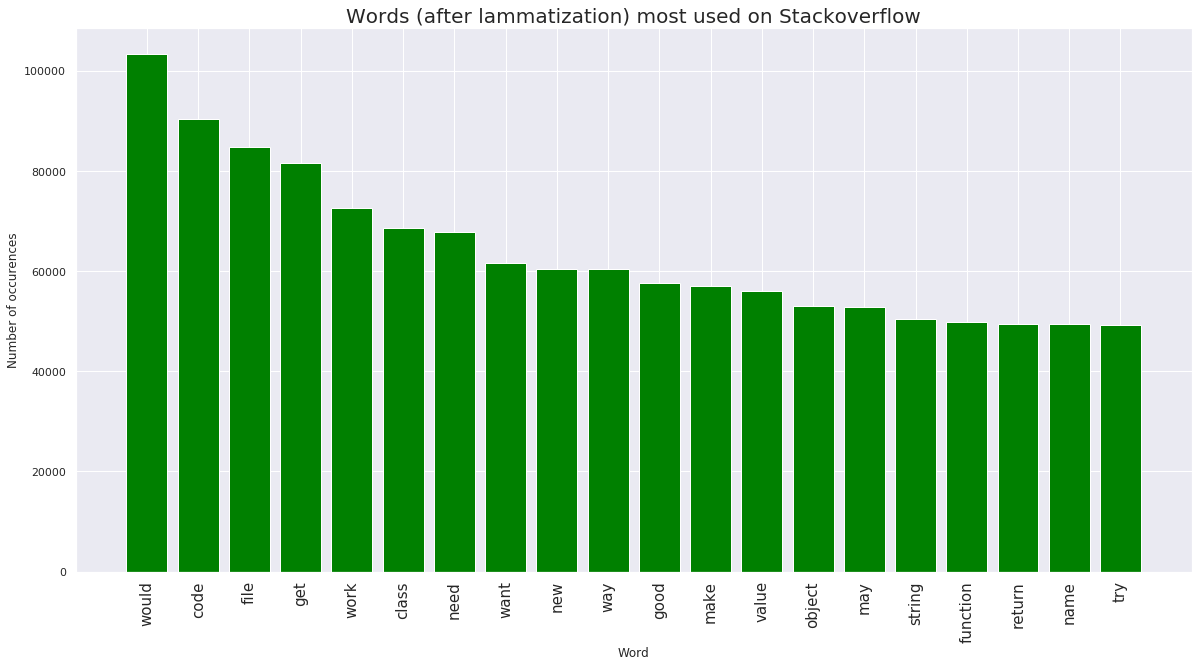

In [0]:
words_lemmatized = dict()

for sentence in data_lemmatized:
    
    for word in sentence.split():
        
        if word not in words_lemmatized.keys():
            words_lemmatized[word] = 1
           
        elif word in words_lemmatized.keys():
            words_lemmatized[word] += 1
            
occurences_lemmatized = []
    
for word, occurence in words_lemmatized.items():
    occurences_lemmatized.append([word, occurence])
            
occurences_lemmatized.sort(key = lambda x:x[1], reverse = True)
words_lemmatized_occurences = occurences_lemmatized[1:21]

# Graph showing the words (after lammatization) most used on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_lemmatized_occurences]
x_axis = [k for k,i in enumerate(words_lemmatized_occurences)]
label_x = [i[0] for i in words_lemmatized_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='green')
plt.title("Words (after lammatization) most used on Stackoverflow",fontsize=20)
plt.show()

In [0]:
# Lemmatization keeping only Noun, Adj, Adverb
data_lemmatized2 = lemmatization(data_words, ['NOUN', 'ADJ', 'ADV'])

print(data_lemmatized2[:2])

['use track bar change form opacity code decimal tran trackbar value opacity tran application error not implicitly type decimal double tran double control work code fine vb net project', 'absolutely positioned div several child relatively positioned div use percentage width child div width internet explorer firefox use pixel width parent relatively percentage width child something easy fix pixel width child area css specification']


In [0]:
d_lemm2 = {'col':data_lemmatized2}
df_lemmatized2 = pd.DataFrame(data=d_lemm2)
df_lemmatized2.head()

,col
0,use track bar change form opacity code decimal...
1,absolutely positioned div several child relati...
2,explicit double necessary double tran double t...
3,datetime person birthday calculate age year
4,specific datetime value display relative time ...


In [0]:
# save lemmatized data to save time for next times

df_lemmatized2.to_csv("lemmatized__v2.csv",encoding='utf-8', index=False)
!cp lemmatized__v2.csv drive/My\ Drive/

In [0]:
# load the lemmatized2 corpus

df_lem2 = pd.read_csv('lemmatized__v2.csv?dl=0')
data_lemmatized2 = df_lem2['col'].astype('U')
data_lemmatized2 = data_lemmatized2.values
data_lemmatized2

array(['use track bar change form opacity code decimal tran trackbar value opacity tran application error not implicitly type decimal double tran double control work code fine vb net project',
       'absolutely positioned div several child relatively positioned div use percentage width child div width internet explorer firefox use pixel width parent relatively percentage width child something easy fix pixel width child area css specification',
       'explicit double necessary double tran double trackbar value constant sufficient double tran trackbar value double tran trackbar value',
       ...,
       'quick observation script datum column column datum index unused also system table also server book objname result whole database also page book always large sum unallocated space size log file data page thing run dbcc updateusage accurate figure also server book sp_spaceused transact sql',
       'preg_replace pee regular expression source code php wpautop function sure anyone actuall

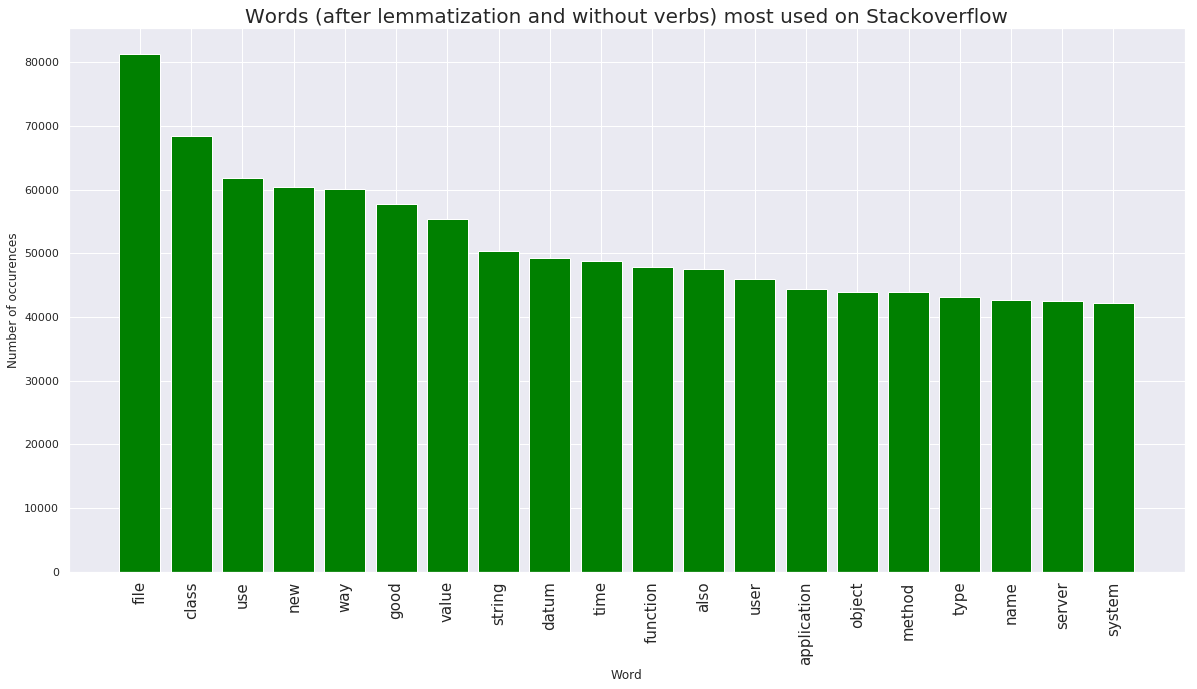

In [0]:
words_lemmatized2 = dict()

for sentence in data_lemmatized2:
    
    for word in sentence.split():
        
        if word not in words_lemmatized2.keys():
            words_lemmatized2[word] = 1
           
        elif word in words_lemmatized2.keys():
            words_lemmatized2[word] += 1
            
occurences_lemmatized2 = []
    
for word, occurence in words_lemmatized2.items():
    occurences_lemmatized2.append([word, occurence])
            
occurences_lemmatized2.sort(key = lambda x:x[1], reverse = True)
words_lemmatized2_occurences = occurences_lemmatized2[1:21]

# Graph showing the words (after lammatization and without verbs) most used on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_lemmatized2_occurences]
x_axis = [k for k,i in enumerate(words_lemmatized2_occurences)]
label_x = [i[0] for i in words_lemmatized2_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='green')
plt.title("Words (after lemmatization and without verbs) most used on Stackoverflow",fontsize=20)
plt.show()

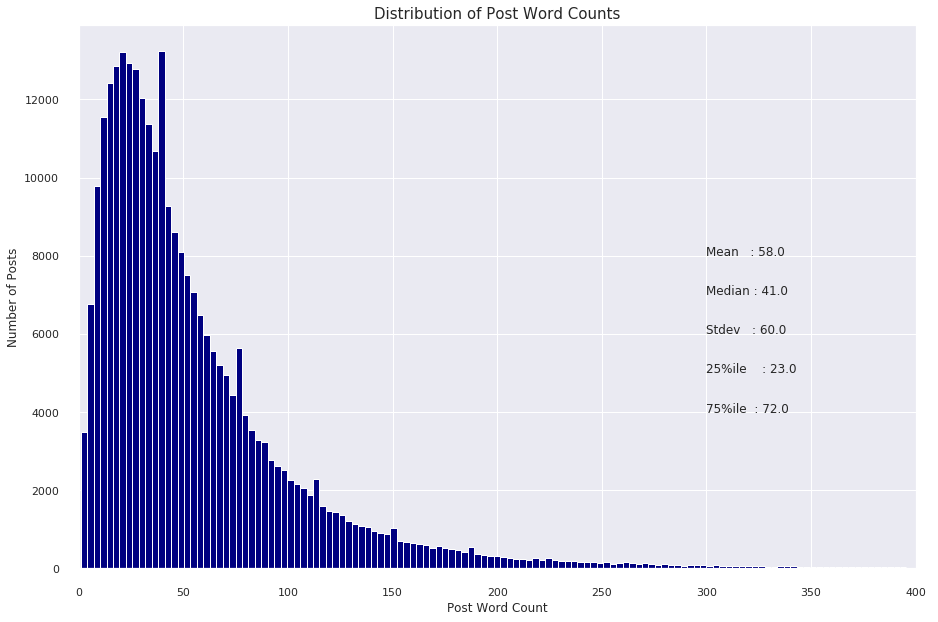

In [0]:
# Plot the distribution of Post Word Counts

split_posts = [word.split() for word in data_lemmatized]
doc_lens = [len(post) for post in split_posts]

plt.figure(figsize=(15,10))
plt.hist(doc_lens, bins=800, color='navy')
plt.text(300, 8000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(300, 7000, "Median : " + str(round(np.median(doc_lens))))
plt.text(300, 6000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(300, 5000, "25%ile    : " + str(round(np.quantile(doc_lens, q=0.25))))
plt.text(300, 4000, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(xlim=(0, 400), ylabel='Number of Posts', xlabel='Post Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Post Word Counts', fontdict=dict(size=15))
plt.show()

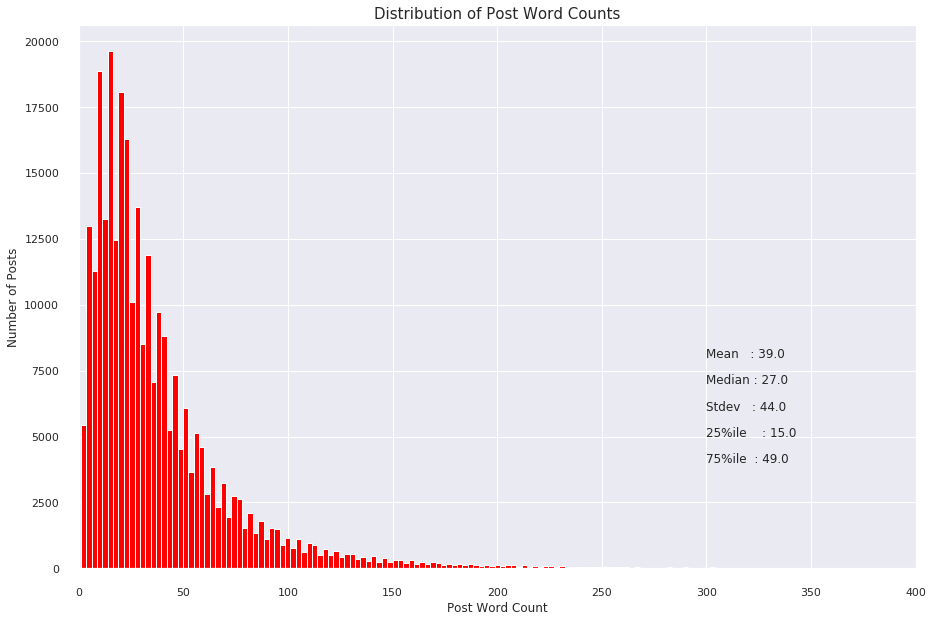

In [0]:
# Plot the distribution of Post Word Counts

split_posts = [word.split() for word in data_lemmatized2]
doc_lens = [len(post) for post in split_posts]

plt.figure(figsize=(15,10))
plt.hist(doc_lens, bins=800, color='red')
plt.text(300, 8000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(300, 7000, "Median : " + str(round(np.median(doc_lens))))
plt.text(300, 6000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(300, 5000, "25%ile    : " + str(round(np.quantile(doc_lens, q=0.25))))
plt.text(300, 4000, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(xlim=(0, 400), ylabel='Number of Posts', xlabel='Post Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Post Word Counts', fontdict=dict(size=15))
plt.show()

In [0]:
def print_top_words(model, feature_names, n_top_words):
    ''' it shows the top words from the different clusters of a model
    
    Parameters:
    
    model: model 
    feature_names: different words to show 
    n_top_words (int): number of words to print for each feature '''
    
    for topic_idx, topic in enumerate(model.components_):
        message = "Tag #%d: " % topic_idx
        message += " / ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [0]:
n_features = 3000
tf_vectorizer_bow1 = TfidfVectorizer(max_df=0.9, min_df=2,
                                max_features=n_features,
                                stop_words='english')

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=3000, n_components=20)
# with bag of words model
 
n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_bow1 = tf_vectorizer_bow1.fit_transform(data_lemmatized)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_bow1)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_bow1.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: svn file repository git branch directory subversion commit merge revision diff check folder copy change
Tag #1: string character regex match use text byte word length number str line file array char
Tag #2: table sql database select query column row datum use store insert mysql server value index
Tag #3: public string void new return exception class static object function null std method private int
Tag #4: django flex dir car ant country jsp diagram try dd writer arr adobe yyyy idiom
Tag #5: file project use dll path visual build studio assembly version application run debug code exe
Tag #6: test use code work good project unit tool application build ve need make look time
Tag #7: control form asp page event view button mvc controller net item action bind submit click
Tag #8: int value return function type array pointer operator null const cast obj float double use
Tag #9: class method object public pr

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=3000, n_components=20)
# with bag of words model and a lemmatized corpus without verbs
 
n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_bow1 = tf_vectorizer_bow1.fit_transform(data_lemmatized2)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_bow1)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_bow1.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: tag / hash / val / span / array / group / str / datacontext / netbean / namespace / min / head / max / diagnostic / md
Tag #1: session / request / model / mvc / net / page / view / controller / web / user / datum / object / service / application / action
Tag #2: table / sql / column / query / select / database / row / datum / value / field / index / key / record / insert / procedure
Tag #3: class / string / int / public / function / method / object / value / return / new / type / foo / code / list / static
Tag #4: character / word / expression / regular / string / flex / letter / regex / builder / format / timestamp / replace / logger / dir / locale
Tag #5: project / file / visual / studio / version / assembly / build / dll / eclipse / code / net / source / application / tool / debug
Tag #6: class / control / interface / component / window / dialog / macro / frame / application / grid / net / method / c

In [0]:
n_features = 300 
tf_vectorizer_bow2 = TfidfVectorizer(max_df=0.9, min_df=2,
                                max_features=n_features,
                                stop_words='english')

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=300, n_components=20)
# With bag of words model

n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_bow2 = tf_vectorizer_bow2.fit_transform(data_lemmatized)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_bow2)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_bow2.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: python library dll print import use self model link reference file class function object include
Tag #1: server service web application app client connection use user machine run access need window database
Tag #2: string int return function value var character char byte str null length use number true
Tag #3: look answer question good pretty check post site use search ask recommend option resource want
Tag #4: thread compiler code variable use loop block time performance compile case fix statement function make
Tag #5: file php path directory log header request url use content include user http server set
Tag #6: class public object method foo property void type use new static return interface private string
Tag #7: line command file script debug output run use program copy window execute code work want
Tag #8: use try learn think good just work don thing people time code really make lot
Tag #9: table 

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=300, n_components=20)
# With bag of words model and a lemmatized corpus without verbs

n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_bow2 = tf_vectorizer_bow2.fit_transform(data_lemmatized2)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_bow2)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_bow2.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: window / application / app / machine / user / program / dll / environment / security / thank / file / net / run / server / way
Tag #1: file / path / directory / svn / script / folder / task / process / resource / local / delete / change / project / version / way
Tag #2: time / good / thing / code / answer / day / question / people / really / problem / bug / point / year / work / way
Tag #3: web / service / page / request / site / client / server / config / user / url / response / net / application / file / configuration
Tag #4: thread / view / session / node / true / loop / compiler / false / console / state / context / operation / code / process / event
Tag #5: control / item / form / button / list / property / action / color / box / option / value / post / space / user / default
Tag #6: xml / language / memory / model / programming / pattern / book / design / domain / good / structure / rule / datum /

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=300, n_components=30)
# With bag of words model and a lemmatized corpus without verbs

n_components = 30 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_bow2 = tf_vectorizer_bow2.fit_transform(data_lemmatized2)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_bow2)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_bow2.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: javascript / page / browser / tag / css / html / script / text / document / style / element / content / function / file / link
Tag #1: exception / word / document / template / rule / stack / standard / level / code / structure / error / information / function / library / use
Tag #2: key / database / datum / model / delete / store / table / access / user / object / way / application / value / good / file
Tag #3: foo / bar / color / parameter / module / action / quite / available / function / value / method / class / default / use / new
Tag #4: php / path / log / error / file / context / load / script / directory / simply / function / useful / variable / command / output
Tag #5: answer / question / style / space / format / point / width / use / solution / way / problem / right / real / good / correct
Tag #6: free / software / task / product / platform / support / component / good / window / tool / applica

In [0]:
n_features = 3000
tf_vectorizer_2gram1 = TfidfVectorizer(max_df=0.9, min_df=2,
                                max_features=n_features,
                                stop_words='english', ngram_range=(2,2))

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=5000, n_components=20)
# with 2-gram model 
 
n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_2gram1 = tf_vectorizer_2gram1.fit_transform(data_lemmatized)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_2gram1)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_2gram1.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: public static / microsoft com / public class / public void / msdn microsoft / com library / http msdn / int int / return value / static void / string string / blog post / public string / value value / string format
Tag #1: ve use / xml file / use jquery / example com / problem use / http blog / internet explorer / use method / query select / xml document / result set / return result / php net / similar problem / http www
Tag #2: unit test / want look / easy way / web server / net framework / unit testing / really want / try set / test test / float point / people use / ask question / try add / test code / code base
Tag #3: web service / good idea / thank advance / extension method / need make / want know / compile time / window server / make work / good approach / standard library / web browser / long run / worth look / pretty easy
Tag #4: don want / make sure / primary key / good thing / inner join / so

In [0]:
n_features = 300 
tf_vectorizer_2gram2 = TfidfVectorizer(max_df=0.9, min_df=2,
                                max_features=n_features,
                                stop_words='english', ngram_range=(2,2))

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=5000, n_components=20)
# with 2-gram model

n_components = 20 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_2gram2 = tf_vectorizer_2gram2.fit_transform(data_lemmatized)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_2gram2)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_2gram2.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: don need / public void / text file / net application / set value / low level / code run / line line / use visual / public string / visual studio / public class / public static / string format / new string
Tag #1: type text / method use / simple way / public static / function use / log file / object sender / document getelementbyid / input type / private void / content type / different way / text javascript / background color / static method
Tag #2: microsoft com / don use / end end / console writeline / xml file / msdn microsoft / com library / http msdn / static void / datum structure / line code / event handler / public static / blog post / pretty good
Tag #3: don think / ve use / public class / use use / programming language / just add / string string / want check / source file / design pattern / use linq / class implement / object orient / class method / public int
Tag #4: good way / create new / re

In [0]:
# Tag extraction with Latent Dirichlet Allocation Algorithm (n_features=5000, n_components=20)
# with 2-gram model and a lemmatized corpus without verbs

n_components = 30 # number of topics
n_top_words = 15


print("Extracting term frequency features for LDA...")
tf_2gram2 = tf_vectorizer_2gram2.fit_transform(data_lemmatized2)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf_2gram2)

print("\n The tags in the LDA model :")
tf_feature_names = tf_vectorizer_2gram2.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting term frequency features for LDA...

 The tags in the LDA model :
Tag #0: web application / type text / right click / document getelementbyid / content type / text javascript / datum database / element element / return false / javascript function / script type / query string / master page / body html / form form
Tag #1: unit test / simple way / linq sql / unit testing / datum source / error code / date time / string format / project file / date date / application server / return result / datum type / answer question / public interface
Tag #2: source code / public class / public void / long time / public string / line line / source file / class public / line code / code use / page page / datum datum / public int / new list / code file
Tag #3: good way / xml file / user control / use case / configuration file / xml document / way code / code good / base class / visual studio / sender eventarg / option option / stack trace / width height / microsoft com
Tag #4: open source / sou

In [0]:
Tags = {0: ['javascript', 'html', 'css']
       1: ['database']
       2: ['exception', 'template']
       3: ['memory']
       4: ['php']
       5: ['css', 'style', 'format']
       6: ['software', 'application']
       7: ['comand', 'loop']
       8: ['performance', 'time']
       9: ['image', 'view', 'html']
       10: ['item', 'class', 'list']
       11: ['compiler', 'library']
       12: ['html', 'aspx']
       13: ['class', 'method', 'object']
       14: ['java', 'xml', 'python']
       15: ['file', 'svn']
       16: ['environment']
       17: ['type', 'function']
       18: ['visual studio', '.net']
       19: ['function', 'variable']
       20: ['event', 'user']
       21: ['pointer', 'console']
       22: ['web', 'app']
       23: ['server', 'sql', 'database']
       24: ['dll', '.net']
       25: ['file', 'import']
       26: ['url', 'request']
       27: ['date', 'time']
       28: ['table', 'sql' 'database']
       29: ['framework', 'api']}

In [38]:
# Making a list of the different tags 

set_tags = set()

for list_keywords in df['Tags'].str.split('>').values:
    
    if isinstance(list_keywords, float): 
        continue 
    
    set_tags = set_tags.union(list_keywords)
    
    

def count_tag(data, ref_col, list_words, ): 
    ''' Count the number of occurrences for each tag
    
    Parameters:
    
        data (dataframe): dataframe to use 
        ref_col (serie): column of dataframe containing tags
        list_words (list): list of different tags
    '''
    
    keyword_count = dict()
    
    for s in list_words: 
        keyword_count[s] = []
        keyword_count[s].append(0)
        
    for list_keywords in data[ref_col].str.split('>'): 
        
        if type(list_keywords) == float and pd.isnull(list_keywords): 
            continue
            
        for s in [s for s in list_keywords if s in list_words]: 
            if pd.notnull(s):
                keyword_count[s][0] += 1
                    
    # conversion of our dictionary into a list
    keyword_occurences = []
    
    for tag, item in keyword_count.items():
        keyword_occurences.append([tag[1:], item[0]])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences

keyword_occurences = count_tag(df, 'Tags', set_tags)
keyword_occurences[1:5]

[['c#', 7836], ['.net', 6108], ['java', 4461], ['asp.net', 3930]]

In [0]:
df_supervised = df.loc[pd.isna(df['Tags'])==False]

In [34]:
df_supervised.reset_index(inplace=True)
df_supervised.head(10)

,level_0,index,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,0,0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,2,46.0,NaN,2012-10-31 16:42:47
1,1,1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN
2,2,3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,422.0,NaN,2011-08-16 19:40:43
3,3,4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36.0,3,536.0,NaN,2009-09-04 13:15:59
4,4,6,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,144.0,NaN,NaN
5,5,7,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,389,117797.0,"<p>What is the difference between <a href=""htt...",11.0,Anonymous User,6495084.0,Rich B,2017-02-25 17:42:17,2018-09-19 03:49:19,Difference between Math.Floor() and Math.Trunc...,<.net><math>,10.0,4,55.0,NaN,NaN
6,6,8,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,121,80977.0,<p>How do you expose a LINQ query as an ASMX w...,2.0,NaN,567854.0,Chris Fournier,2019-01-20 13:50:51,2019-01-20 13:50:51,Filling a DataSet or DataTable from a LINQ que...,<c#><linq><web-services><.net-3.5>,6.0,0,14.0,NaN,NaN
7,7,9,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,171,70175.0,"<p>How do I store binary data in <a href=""http...",2.0,NaN,546051.0,NaN,2011-10-21 21:29:17,2018-01-20 09:06:34,Binary Data in MySQL,<mysql><database><binary-data><data-storage>,9.0,3,19.0,2018-11-29 15:36:04,NaN
8,8,11,19,1,531.0,NaN,2008-08-01 05:21:22,NaN,306,45919.0,<p>I'm looking for the fastest way to obtain t...,13.0,NaN,13.0,Chris Jester-Young,2018-05-15 16:45:05,2019-01-31 02:00:09,What is the fastest way to get the value of π?,<performance><algorithm><language-agnostic><un...,23.0,16,79.0,NaN,NaN
9,9,13,24,1,49.0,NaN,2008-08-01 12:12:19,NaN,156,68536.0,<p>If I have a <code>trigger</code> <code>befo...,22.0,NaN,5195227.0,Jim Anderson,2016-03-11 08:26:05,2016-11-19 21:05:59,Throw an error in a MySQL trigger,<mysql><database><triggers>,6.0,0,23.0,NaN,NaN


In [0]:
# Pour l'apprentissage supervisée

index = 0
df_supervised['New_Tags'] = 0
list_tags = [i[0] for i in keyword_occurences[1:51]]
list_of_list_tags = df_supervised['Tags'].str.split('>').values

for tags in list_of_list_tags:
    new_tags = []
    
    for tag in tags:      
        
        if tag[1:] in list_tags:
            new_tags.append(tag[1:])
            
    df_supervised['New_Tags'][index] = new_tags
    index += 1

In [44]:
df_supervised.head()

,level_0,index,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,New_Tags,N_Tags
0,0,0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,2,46.0,NaN,2012-10-31 16:42:47,[c#],0
1,1,1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN,"[html, css]",0
2,2,3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,422.0,NaN,2011-08-16 19:40:43,"[c#, .net]",0
3,3,4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36.0,3,536.0,NaN,2009-09-04 13:15:59,[c#],0
4,4,6,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,144.0,NaN,NaN,[html],0


In [0]:
# One hot encoding on the variable Tags_LDA_BOW1

for tag in range(len(df_supervised['New_Tags'].unique())):
    df["Tag{}".format(str(tag))] = df['Tags_Supervised'].str.contains(str(tag)).apply(lambda x:1 if x else 0)